In [1]:
from keras.datasets import boston_housing
from keras.datasets import reuters
import numpy as np
import os
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
import time
import pandas as pd
import random
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam,Adagrad

Using TensorFlow backend.


In [2]:
df = pd.read_excel(r'C:\Users\Big data\Desktop\class\funcardproject\斷詞與和卡額度_20群.xls',encoding='utf-16')
df = df.loc[:, ["age","serveTime","credLimit","Loan","SalPerY","holdCard","Career","credLimit_group"]] 
len(df)

1687

In [3]:
df =df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any'   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    ) 

In [4]:
df['credLimit_group'] = df['credLimit_group'].astype('int')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1680 entries, 0 to 1686
Data columns (total 8 columns):
age                1680 non-null float64
serveTime          1680 non-null float64
credLimit          1680 non-null int64
Loan               1680 non-null float64
SalPerY            1680 non-null int64
holdCard           1680 non-null int64
Career             1680 non-null int64
credLimit_group    1680 non-null int32
dtypes: float64(3), int32(1), int64(4)
memory usage: 111.6 KB


In [6]:
#先打散資料(三次)
for i in range(3):
    df = shuffle(df)
#再切成訓練與測試
train_data, test_data, train_targets, test_targets = train_test_split(df.loc[:, ["age","serveTime","Loan","SalPerY","holdCard","Career"]] , df.loc[:, ["credLimit_group"]] , test_size=0.3)
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(1176, 6)
(504, 6)
(1176, 1)
(504, 1)


In [7]:
#轉array
train_data = np.array(train_data).astype(float)
test_data = np.array(test_data).astype(float)
train_targets = np.array(train_targets).astype(int)
test_targets = np.array(test_targets).astype(int)


In [8]:
def to_one_hot(labels, dimension=20):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1.
    return results
train_targets = to_one_hot(train_targets)
test_targets = to_one_hot(test_targets)

In [9]:
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(1176, 6)
(504, 6)
(1176, 20)
(504, 20)


# 正規化(例如本資料serveTime與SalPerY不同單位且數值差異甚大,因此需轉為標準差)

In [10]:
# 懶人正規化??????????????????????
mean = train_data.mean(axis=0)
train_data -=mean
std = train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std


# 建立模型

In [11]:
#模型定義
model = models.Sequential()
model.add(layers.Dense(30, activation='relu',input_shape=(6 , )))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(20, activation='relu'))




model.add(layers.Dense(20, activation='softmax'))

In [12]:

model.compile(optimizer=optimizers.RMSprop(lr=0.0001, rho=0.9),
              loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
Total params: 1,925
Trainable params: 1,925
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(train_data,
                    train_targets,
                    epochs=200,
                    batch_size=4,
                    validation_data=(test_data,test_targets)
)

Train on 1176 samples, validate on 504 samples
Epoch 1/200
1176/1176 [==============================] - 0s 290us/step - loss: 2.9679 - accuracy: 0.1148 - val_loss: 2.8811 - val_accuracy: 0.1726
Epoch 2/200
1176/1176 [==============================] - 0s 212us/step - loss: 2.8089 - accuracy: 0.1871 - val_loss: 2.7245 - val_accuracy: 0.1905
Epoch 3/200
1176/1176 [==============================] - 0s 214us/step - loss: 2.6409 - accuracy: 0.2032 - val_loss: 2.5468 - val_accuracy: 0.1984
Epoch 4/200
1176/1176 [==============================] - 0s 219us/step - loss: 2.4540 - accuracy: 0.2058 - val_loss: 2.3571 - val_accuracy: 0.2024
Epoch 5/200
1176/1176 [==============================] - 0s 213us/step - loss: 2.2683 - accuracy: 0.2058 - val_loss: 2.1775 - val_accuracy: 0.2024
Epoch 6/200
1176/1176 [==============================] - 0s 212us/step - loss: 2.1062 - accuracy: 0.2364 - val_loss: 2.0291 - val_accuracy: 0.2798
Epoch 7/200
1176/1176 [==============================] - 0s 212us/step 

1176/1176 [==============================] - 0s 211us/step - loss: 1.6315 - accuracy: 0.3861 - val_loss: 1.7200 - val_accuracy: 0.3135
Epoch 57/200
1176/1176 [==============================] - 0s 216us/step - loss: 1.6299 - accuracy: 0.3844 - val_loss: 1.7197 - val_accuracy: 0.3075
Epoch 58/200
1176/1176 [==============================] - 0s 235us/step - loss: 1.6290 - accuracy: 0.3835 - val_loss: 1.7184 - val_accuracy: 0.3075
Epoch 59/200
1176/1176 [==============================] - 0s 218us/step - loss: 1.6277 - accuracy: 0.3835 - val_loss: 1.7183 - val_accuracy: 0.3115
Epoch 60/200
1176/1176 [==============================] - 0s 234us/step - loss: 1.6272 - accuracy: 0.3793 - val_loss: 1.7180 - val_accuracy: 0.3135
Epoch 61/200
1176/1176 [==============================] - 0s 212us/step - loss: 1.6249 - accuracy: 0.3835 - val_loss: 1.7184 - val_accuracy: 0.3155
Epoch 62/200
1176/1176 [==============================] - 0s 225us/step - loss: 1.6249 - accuracy: 0.3750 - val_loss: 1.7159 

1176/1176 [==============================] - 0s 221us/step - loss: 1.5827 - accuracy: 0.3937 - val_loss: 1.6978 - val_accuracy: 0.3155
Epoch 112/200
1176/1176 [==============================] - 0s 213us/step - loss: 1.5813 - accuracy: 0.3971 - val_loss: 1.6989 - val_accuracy: 0.3095
Epoch 113/200
1176/1176 [==============================] - 0s 209us/step - loss: 1.5812 - accuracy: 0.3997 - val_loss: 1.6992 - val_accuracy: 0.3095
Epoch 114/200
1176/1176 [==============================] - 0s 221us/step - loss: 1.5799 - accuracy: 0.3988 - val_loss: 1.6977 - val_accuracy: 0.3155
Epoch 115/200
1176/1176 [==============================] - 0s 229us/step - loss: 1.5796 - accuracy: 0.4022 - val_loss: 1.6972 - val_accuracy: 0.3135
Epoch 116/200
1176/1176 [==============================] - 0s 212us/step - loss: 1.5789 - accuracy: 0.4031 - val_loss: 1.6971 - val_accuracy: 0.3075
Epoch 117/200
1176/1176 [==============================] - 0s 221us/step - loss: 1.5784 - accuracy: 0.4031 - val_loss: 1

1176/1176 [==============================] - 0s 218us/step - loss: 1.5487 - accuracy: 0.4337 - val_loss: 1.6948 - val_accuracy: 0.3036
Epoch 167/200
1176/1176 [==============================] - 0s 212us/step - loss: 1.5483 - accuracy: 0.4311 - val_loss: 1.6904 - val_accuracy: 0.3095
Epoch 168/200
1176/1176 [==============================] - 0s 209us/step - loss: 1.5486 - accuracy: 0.4303 - val_loss: 1.6910 - val_accuracy: 0.3115
Epoch 169/200
1176/1176 [==============================] - 0s 214us/step - loss: 1.5473 - accuracy: 0.4311 - val_loss: 1.6889 - val_accuracy: 0.3115
Epoch 170/200
1176/1176 [==============================] - 0s 217us/step - loss: 1.5463 - accuracy: 0.4345 - val_loss: 1.6901 - val_accuracy: 0.3115
Epoch 171/200
1176/1176 [==============================] - 0s 213us/step - loss: 1.5464 - accuracy: 0.4269 - val_loss: 1.6910 - val_accuracy: 0.3056
Epoch 172/200
1176/1176 [==============================] - 0s 209us/step - loss: 1.5451 - accuracy: 0.4345 - val_loss: 1

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35347 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32244 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33287 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35657 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30340 missing from c

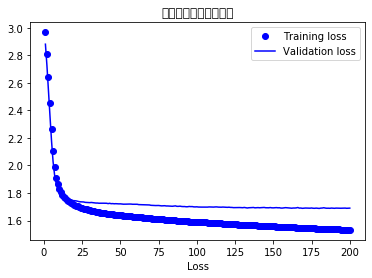

In [15]:
#繪圖

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+ 1)
plt.plot(epochs, loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b',label='Validation loss')
plt.title('訓練與驗證的損失函數')
plt.xlabel('Epohs')
plt.xlabel('Loss')
plt.legend()
plt.show()

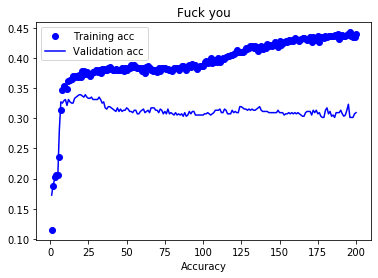

In [16]:
plt.clf()
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title('Fuck you')
plt.xlabel('Epohs')
plt.xlabel('Accuracy')
plt.legend()
plt.show()

# 測試 小綠同學

In [17]:
小綠 = pd.DataFrame(columns=["age","serveTime","Loan","SalPerY","holdCard","Career"])
小綠.loc[0]=8,120,4,600000,1,1
小綠.loc[1]=28,12,0,600000,0,0
小綠.loc[2]=28,12,0,87,2,0
小綠

,age,serveTime,Loan,SalPerY,holdCard,Career
0,8,120,4,600000,1,1
1,28,12,0,600000,0,0
2,28,12,0,87,2,0


In [18]:
# 因為先前輸入時有先標準化,因此輸入也要標準化
小綠-=mean
小綠/=std
小綠

,age,serveTime,Loan,SalPerY,holdCard,Career
0,-4.35757,1.84961,4.39742,-0.102955,0.851082,-1.77296
1,0.283378,-0.346219,-0.575408,-0.102955,-1.17498,-3.37312
2,0.283378,-0.346219,-0.575408,-0.495489,2.87714,-3.37312


In [26]:
# 他給出的是每一群的機率(相加為一)
preds = model.predict(小綠)
preds[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [30]:
#接著我們找出裡面機率最大的值的所在位子
print(np.where(preds[0]==np.max(preds[0])))

(array([0], dtype=int64),)


In [29]:
preds[1]

array([9.9975902e-01, 2.4104267e-04, 8.6009363e-13, 1.7380719e-21,
       2.7840226e-18, 2.6001981e-17, 7.7214279e-20, 3.4693040e-28,
       2.8330106e-21, 6.3681742e-32, 1.1261915e-24, 1.2584696e-29,
       9.3763090e-28, 2.1129929e-26, 2.0012438e-26, 5.9992626e-23,
       3.5284997e-27, 7.2059457e-22, 0.0000000e+00, 1.1678877e-22],
      dtype=float32)